In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def read_pbt_hparams(config_path):
    # read json
    with open(config_path) as file:            
        config = json.load(file)

    pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 
                'model.l2_gen_scale', 'model.l2_con_scale']
    pbt_values = {key:config[key] for key in pbt_keys}

    return pbt_values

name_translation = {
    'chewie_09_15': 'Chewie_CO_FF_2016-09-15',
    'chewie_09_21': 'Chewie_CO_FF_2016-09-21',
    'chewie_10_05': 'Chewie_CO_FF_2016-10-05',
    'chewie_10_07': 'Chewie_CO_FF_2016-10-07',
    'mihili_02_03': 'Mihili_CO_FF_2014-02-03',
    'mihili_02_17': 'Mihili_CO_FF_2014-02-17',
    'mihili_02_18': 'Mihili_CO_FF_2014-02-18',
    'mihili_03_07': 'Mihili_CO_FF_2014-03-07',
}

Matplotlib created a temporary cache directory at /tmp/matplotlib-ho9e31qq because the default path (/afs/inf.ed.ac.uk/user/n/nkudryas/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
results_folder = '/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/'
model_name = 'kl1_gauss'
bs=256

fac_dim=100

try:
    del(LLs)
    del(R2s)
    del(pbt_df)
except NameError:
    pass

for dataset in name_translation.keys():
    for model in ['lfads','band']:
        for area in ['both','M1','PMd']:
            # load LLs
            # join path with band_both_8f_kl1_gauss_bs256
            if area == 'both':
                dataset_name = dataset
            else:
                dataset_name = f'{dataset}_{area}'
            path = os.path.join(results_folder, dataset_name, f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}','LL_diff.csv')
            print(path)
            # if file exists -- read
            if os.path.exists(path):
                # import csv
                df = pd.read_csv(path)
                # add name column
                df['dataset'] = dataset
                df['model'] = model
                df['area'] = area
                # remove the first column
                df = df.drop(columns=['Unnamed: 0'])
                # join with the previous
                try:
                    LLs = pd.concat([LLs, df])
                except NameError:
                    LLs = df

            # load R2s
            path = os.path.join(results_folder, dataset_name, f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}','R2_results.csv')
            # if file exists -- read
            if os.path.exists(path):
                # import csv
                df = pd.read_csv(path)
                # add name column
                df['dataset'] = dataset
                df['model'] = model
                df['area'] = area
                # remove the first column
                df = df.drop(columns=['Unnamed: 0'])
                # join with the previous
                try:
                    R2s = pd.concat([R2s, df])
                except NameError:
                    R2s = df

            # read json:
            config_path = os.path.join(results_folder, dataset_name, f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}',
                            'best_model','params.json')
            pbt_values = read_pbt_hparams(config_path)
            # convert to df
            df = pd.DataFrame(pbt_values, index=[0])
            # add name column
            df['dataset'] = dataset
            df['model'] = model
            df['area'] = area
            # join with the previous
            try:
                pbt_df = pd.concat([pbt_df, df])
            except NameError:
                pbt_df = df



LLs

/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15/lfads_both_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_M1/lfads_M1_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_PMd/lfads_PMd_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15/band_both_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_M1/band_M1_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_PMd/band_PMd_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_21/lfads_both_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_21_M1/lfads_M1_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_21_PMd/lfads_PMd_100f_kl1_gauss_b

,LL,LL_noci,LL_AD,LL_noci_AD,dataset,model,area
0,0.286996,0.205886,0.096752,0.066847,chewie_09_15,lfads,both
0,0.408792,0.149818,0.135474,0.073073,chewie_09_15,lfads,M1
0,0.240038,0.202211,0.076562,0.063033,chewie_09_15,lfads,PMd
0,0.265879,0.214266,0.085831,0.063422,chewie_09_15,band,both
0,0.363206,0.175986,0.117898,0.019033,chewie_09_15,band,M1
0,0.237210,0.187886,0.076082,0.060623,chewie_09_15,band,PMd
0,0.248500,0.209728,0.071518,0.061836,chewie_09_21,lfads,both
0,0.260633,0.103651,0.075773,0.026222,chewie_09_21,lfads,M1
0,0.235642,0.210860,0.067213,0.061932,chewie_09_21,lfads,PMd
0,0.247225,0.155986,0.071035,0.048812,chewie_09_21,band,both


In [3]:
pbt_values

{'model.lr_init': 0.003873955453126765,
 'model.dropout_rate': 0.25607133599600546,
 'model.train_aug_stack.transforms.0.cd_rate': 0.14323577196249665,
 'model.l2_gen_scale': 0.0004320720434753682,
 'model.l2_con_scale': 0.0005531072569440688}

In [4]:
R2s

,seq2seq from factors,seq2seq from factors no CI,seq2seq from factprs in AD,seq2seq from factors no CI in AD,band behavior,band behavior no CI,band behavior in AD,band behavior no CI in AD,seq2seq from controls,dataset,model,area
0,85.144929,74.150557,81.618274,68.964420,-2.504552,-2.670374,-3.516787,-3.675815,9.597019,chewie_09_15,lfads,both
0,82.155953,61.788430,78.097813,56.873317,-3.571452,-3.629127,-4.586394,-4.561373,15.791669,chewie_09_15,lfads,M1
0,84.682794,72.230185,81.010734,65.985663,-1.935104,-1.865067,-2.617311,-2.521259,18.618342,chewie_09_15,lfads,PMd
0,90.884530,77.524276,88.552073,69.040577,91.374266,79.774090,89.331690,71.069718,30.862626,chewie_09_15,band,both
0,90.091762,71.903101,88.157148,59.225323,91.335686,71.418967,89.550745,57.874814,46.055856,chewie_09_15,band,M1
0,87.524810,74.685849,84.171268,67.074852,88.212314,75.958705,84.874573,68.823410,40.294872,chewie_09_15,band,PMd
0,87.610934,69.663307,84.136755,63.559021,-2.209813,-2.313003,-3.695704,-3.633682,23.614325,chewie_09_21,lfads,both
0,83.772624,-4489.558429,83.133144,-5089.298072,-2.471711,-2.306917,-3.181909,-3.077965,31.044942,chewie_09_21,lfads,M1
0,81.858624,65.349934,77.480641,60.975495,-2.275379,-2.331052,-3.021699,-2.975509,24.548101,chewie_09_21,lfads,PMd
0,87.506939,63.572840,83.853120,54.813511,87.658491,67.109524,84.695273,60.748244,29.393676,chewie_09_21,band,both


# Visualize

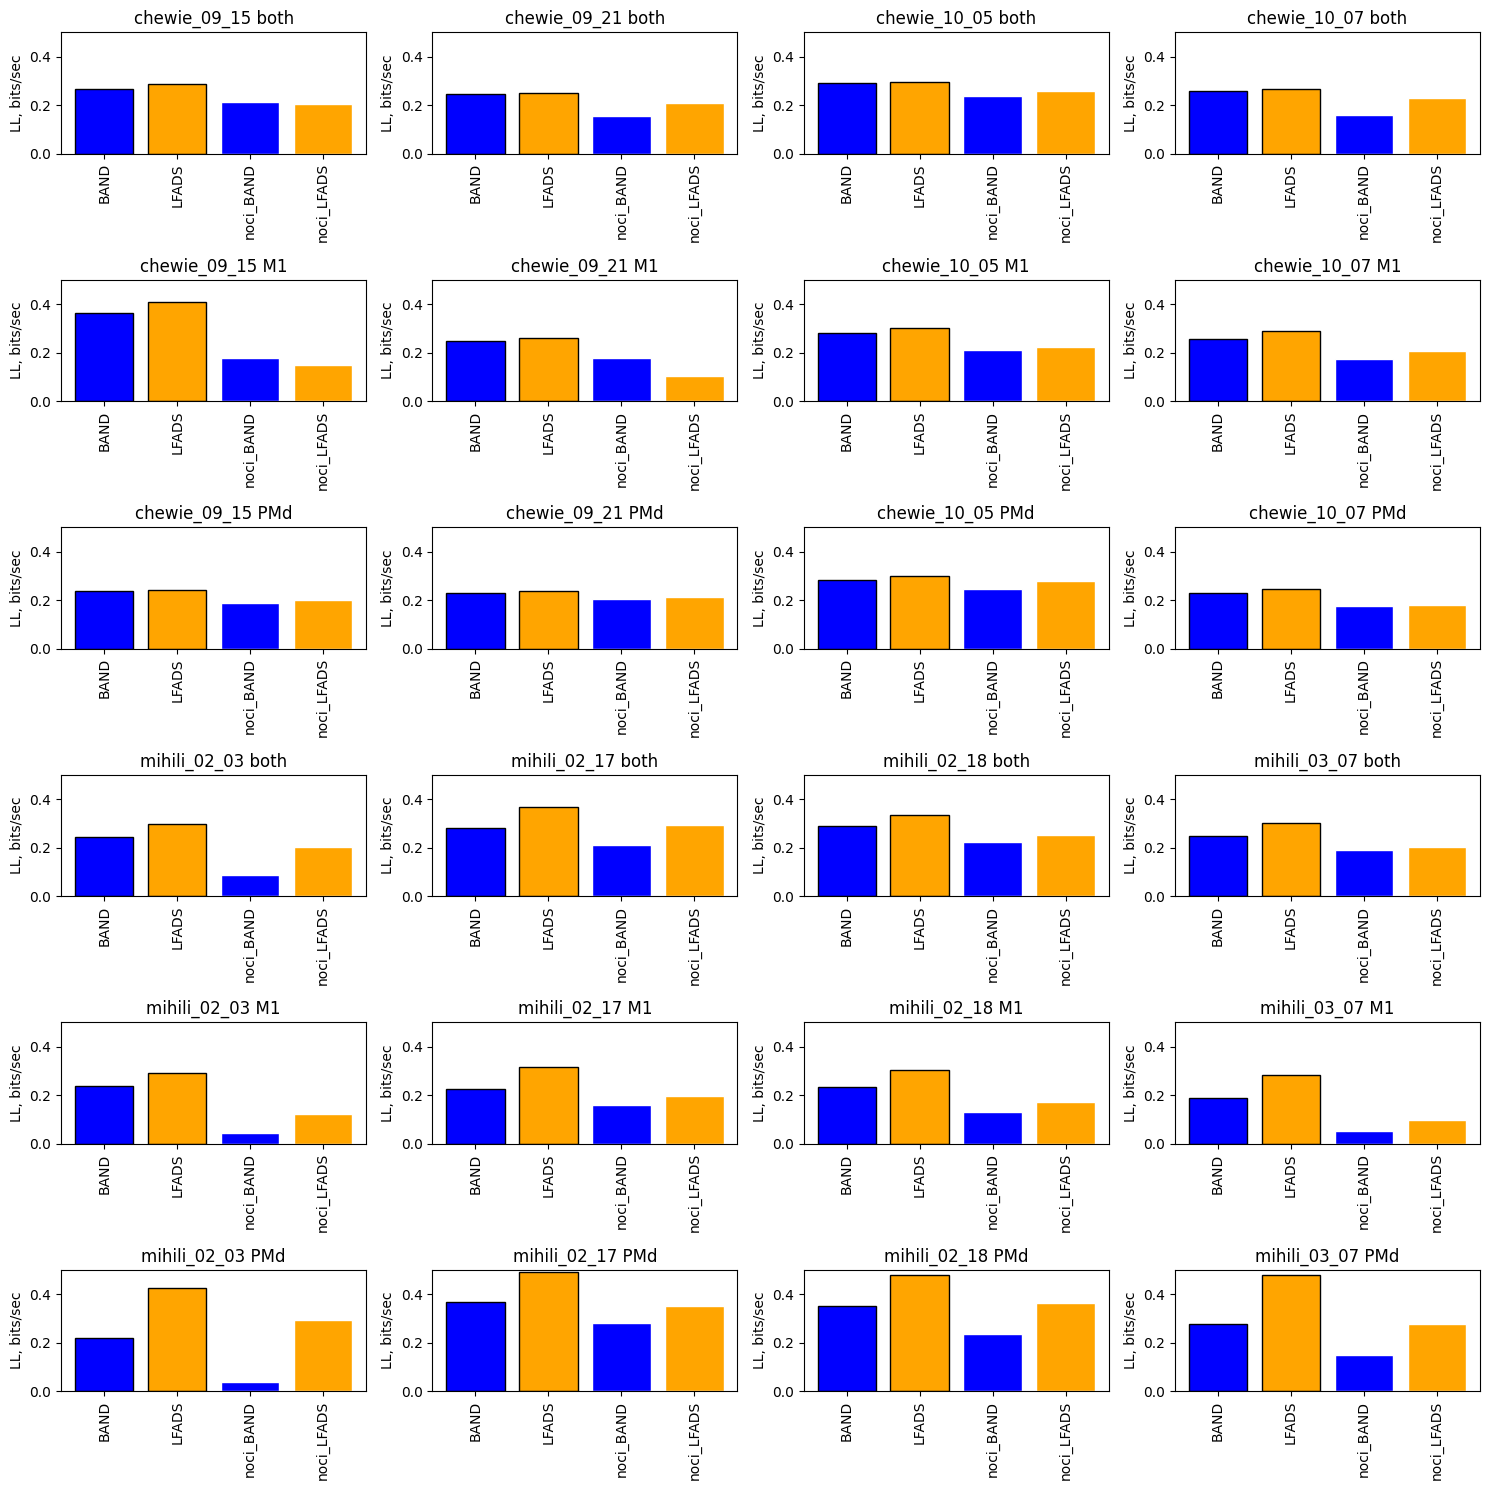

In [5]:
def LLs_barplot(dataset, area, axes):
    # filter by dataset
    df = LLs[(LLs['dataset'] == dataset) & (LLs['area'] == area)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        LL_BAND = df[df['model'] == 'band']['LL'].values[0]
        LL_LFADS = df[df['model'] == 'lfads']['LL'].values[0]
        LL_noci_BAND = df[df['model'] == 'band']['LL_noci'].values[0]
        LL_noci_LFADS = df[df['model'] == 'lfads']['LL_noci'].values[0]
        # plot
        axes.bar(['BAND', 'LFADS', 'noci_BAND', 'noci_LFADS'], [LL_BAND, LL_LFADS, LL_noci_BAND, LL_noci_LFADS],
                 color=['blue', 'orange', 'blue', 'orange'],
                 edgecolor=['black','black','white','white'],
                 linewidth=1)
    axes.set_ylabel('LL, bits/sec')
    axes.set_ylim([0,0.5])
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(dataset+' '+area)
    # remove legend

fig, axes = plt.subplots(2*3, 4, figsize=(15, 15))
for i, dataset in enumerate(name_translation.keys()):
    for j, area in enumerate(['both','M1','PMd']):
        LLs_barplot(dataset, area,axes[(i//4)*3+j, i%4])

plt.tight_layout()

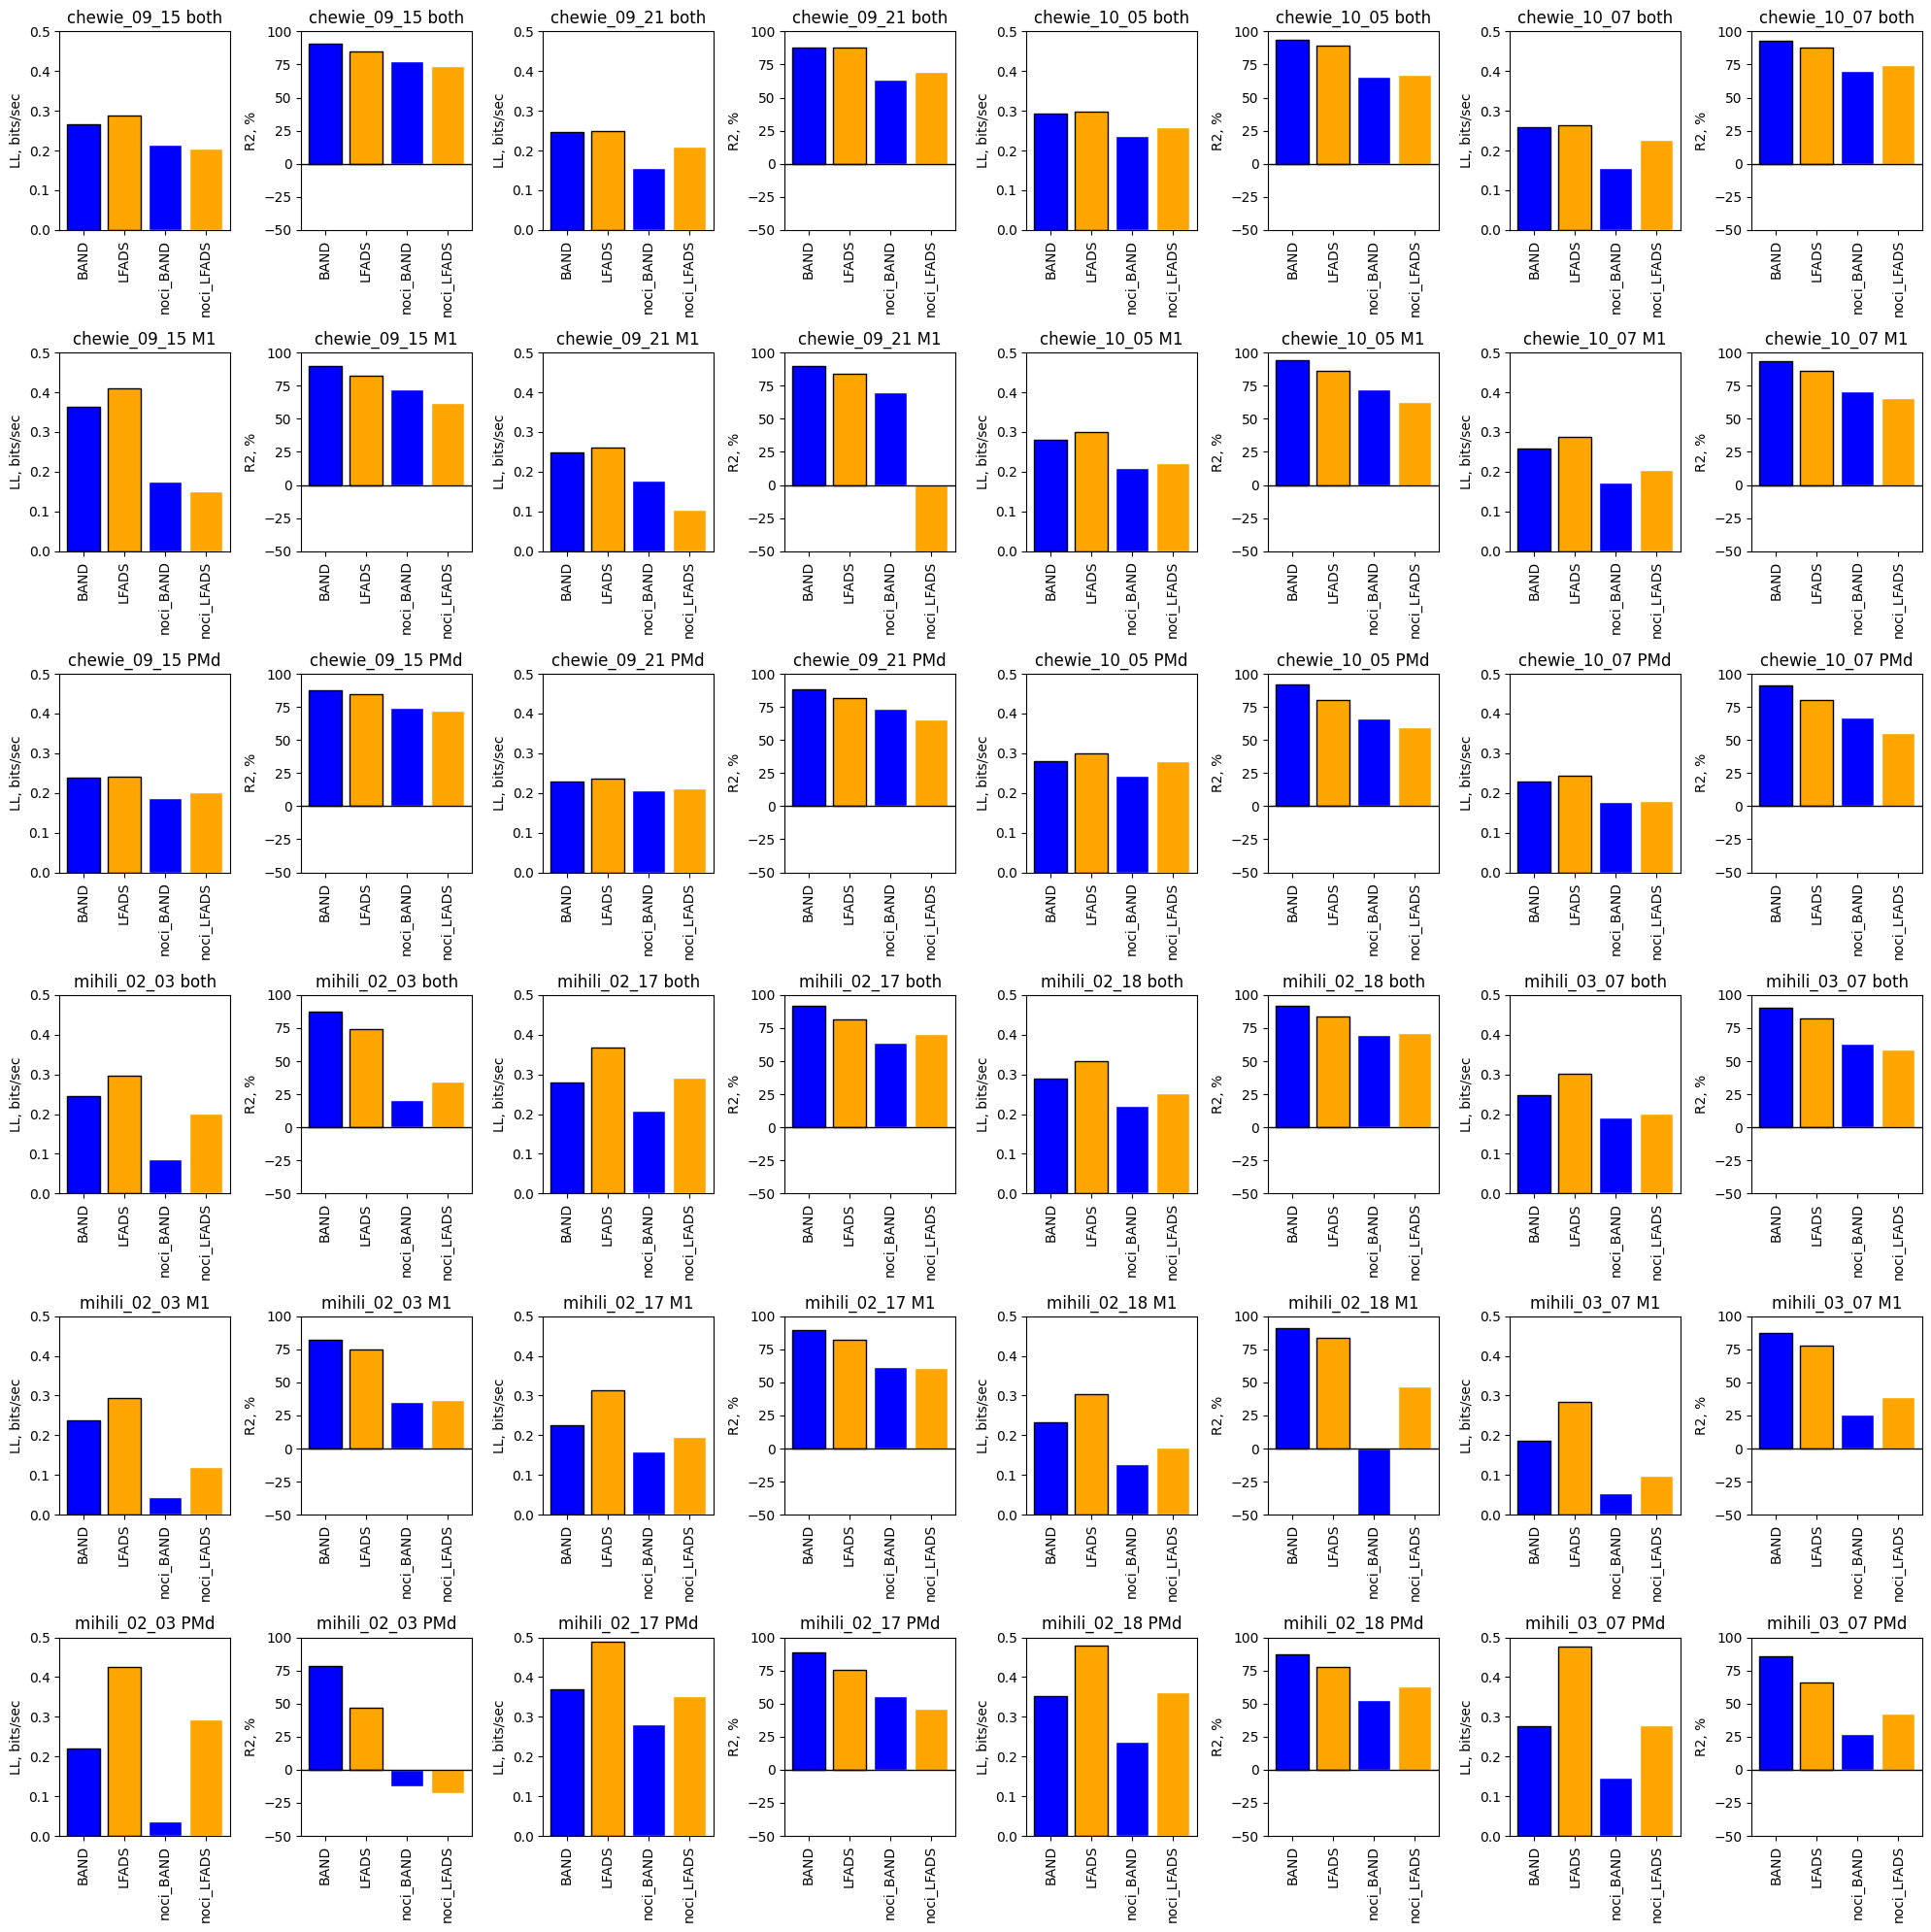

In [6]:
def R2s_barplot(dataset, area, axes):
    # filter by dataset
    df = R2s[(R2s['dataset'] == dataset) & (R2s['area'] == area)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        R2_BAND = df[df['model'] == 'band']['seq2seq from factors'].values[0]
        R2_LFADS = df[df['model'] == 'lfads']['seq2seq from factors'].values[0]
        R2_BAND_noci = df[df['model'] == 'band']['seq2seq from factors no CI'].values[0]
        R2_LFADS_noci = df[df['model'] == 'lfads']['seq2seq from factors no CI'].values[0]
        # plot
        axes.bar(['BAND', 'LFADS', 'noci_BAND', 'noci_LFADS'], [R2_BAND, R2_LFADS, R2_BAND_noci, R2_LFADS_noci],
                 color=['blue', 'orange', 'blue', 'orange'],
                 edgecolor=['black','black','white','white'],
                 linewidth=1)
    axes.set_ylabel('R2, %')
    axes.set_ylim([-50,100])
    axes.tick_params(axis='x', rotation=90)
    axes.axhline(0, color='black', linewidth=1)
    axes.set_title(dataset+' '+area)
    # remove legend

fig, axes = plt.subplots(2*3, 4*2, figsize=(20, 20))
for i, dataset in enumerate(name_translation.keys()):
    for j, area in enumerate(['both','M1','PMd']):
        LLs_barplot(dataset, area,axes[(i//4)*3+j, (i%4)*2 + 0])
        R2s_barplot(dataset, area,axes[(i//4)*3+j, (i%4)*2 + 1])

plt.tight_layout()

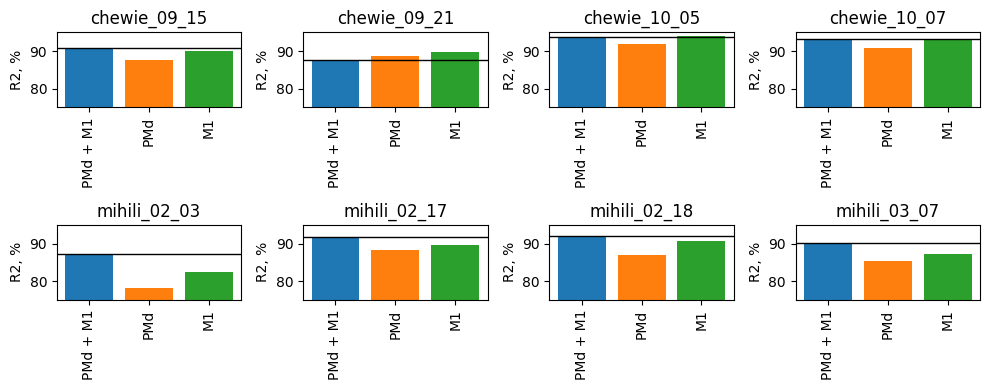

In [7]:
def R2s_across_areas(dataset, model, axes):
    # filter by dataset
    df = R2s[(R2s['dataset'] == dataset) & (R2s['model'] == model)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        R2_both = df[df['area'] == 'both']['seq2seq from factors'].values[0]
        R2_M1 = df[df['area'] == 'M1']['seq2seq from factors'].values[0]
        R2_PMd = df[df['area'] == 'PMd']['seq2seq from factors'].values[0]
        # plot
        axes.bar(['PMd + M1', 'PMd', 'M1'], [R2_both, R2_PMd, R2_M1],
                 color=['C0', 'C1', 'C2'])
        
    axes.axhline(R2_both, color='black', linewidth=1)
    axes.set_ylabel('R2, %')
    axes.set_ylim([75,95])
    axes.tick_params(axis='x', rotation=90)
    axes.axhline(0, color='black', linewidth=1)
    axes.set_title(dataset)
    # remove legend

fig, axes = plt.subplots(2, 4, figsize=(10, 4))
for i, dataset in enumerate(name_translation.keys()):
    R2s_across_areas(dataset, 'band',axes[i//4, i%4])

plt.tight_layout()

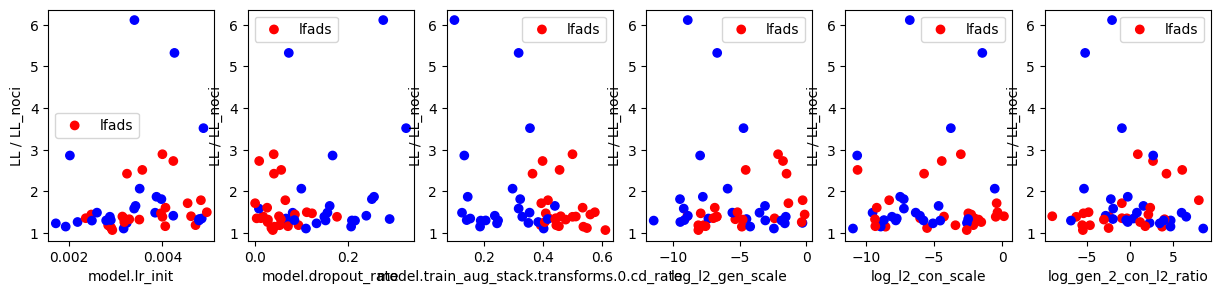

In [8]:
# plot ll ratio to ll_noci vs pbt_params
LLs['LL_ratio'] = LLs['LL'] / LLs['LL_noci']
# join with pbt_df
LLs_pbt = LLs.merge(pbt_df, on=['dataset','model','area'])
LLs_pbt['log_gen_2_con_l2_ratio'] = np.log(LLs_pbt['model.l2_gen_scale'] / LLs_pbt['model.l2_con_scale'])
LLs_pbt['log_l2_gen_scale'] = np.log(LLs_pbt['model.l2_gen_scale'])  
LLs_pbt['log_l2_con_scale'] = np.log(LLs_pbt['model.l2_con_scale'])
# plot
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 
                'log_l2_gen_scale', 'log_l2_con_scale', "log_gen_2_con_l2_ratio"]

for i, param in enumerate(pbt_keys):
    # colorcode lfads vs band
    axes[i].scatter(LLs_pbt[param], LLs_pbt['LL_ratio'], c=LLs_pbt['model'].map({'lfads':'red', 'band':'blue'}))
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('LL / LL_noci')
    # axes[i].set_title(param)
    axes[i].legend(['lfads','band'])

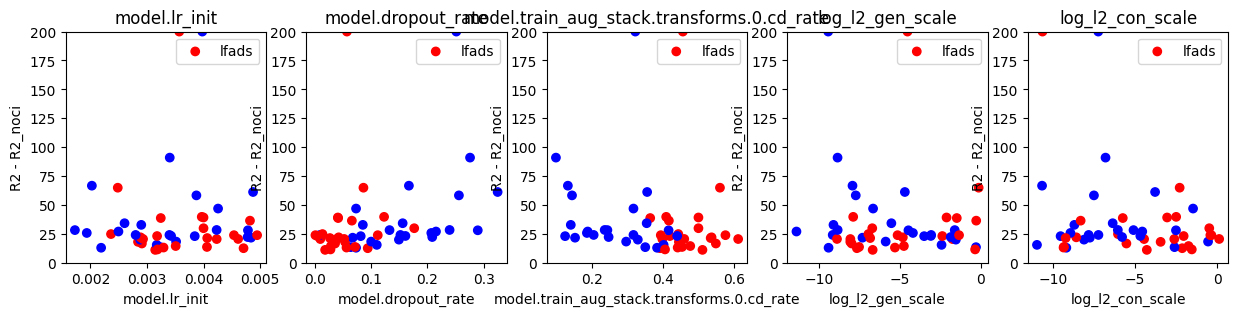

In [9]:
# plot R2 to noci R2 ratio against hyperparameters
R2s['R2_ratio'] = R2s['seq2seq from factors'] - R2s['seq2seq from factors no CI']
# join with pbt_df
R2s_pbt = R2s.merge(pbt_df, on=['dataset','model','area'])
R2s_pbt['log_l2_gen_scale'] = np.log(LLs_pbt['model.l2_gen_scale'])  
R2s_pbt['log_l2_con_scale'] = np.log(LLs_pbt['model.l2_con_scale'])
# plot
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

pbt_keys = ['model.lr_init', 'model.dropout_rate', "model.train_aug_stack.transforms.0.cd_rate", 
                'log_l2_gen_scale', 'log_l2_con_scale']

for i, param in enumerate(pbt_keys):
    # colorcode lfads vs band
    axes[i].scatter(R2s_pbt[param], np.clip(R2s_pbt['R2_ratio'],0,200), c=R2s_pbt['model'].map({'lfads':'red', 'band':'blue'}))
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('R2 - R2_noci')
    axes[i].set_title(param)
    axes[i].set_ylim([0,200])
    axes[i].legend(['lfads','band'])
    

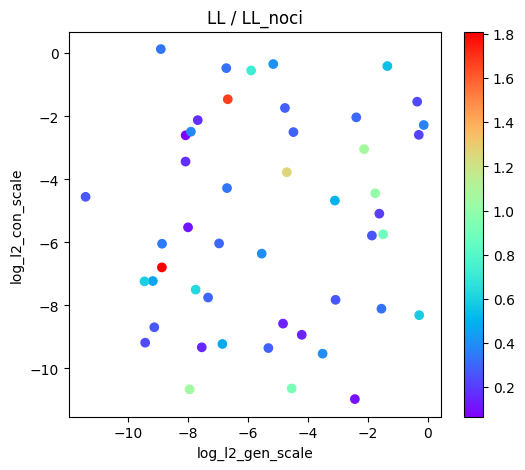

In [32]:
# plot LL/LL_noci as color on a log_l2_gen_scale to log_l2_con_scale plane
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
a = axes.scatter(LLs_pbt['log_l2_gen_scale'], LLs_pbt['log_l2_con_scale'], c=np.log(LLs_pbt['LL_ratio']), cmap='rainbow')
axes.set_xlabel('log_l2_gen_scale')
axes.set_ylabel('log_l2_con_scale')
axes.set_title('LL / LL_noci')
plt.colorbar(ax=axes,mappable=a)

In [33]:
LLs_pbt

,LL,LL_noci,LL_AD,LL_noci_AD,dataset,model,area,LL_ratio,model.lr_init,model.dropout_rate,model.train_aug_stack.transforms.0.cd_rate,model.l2_gen_scale,model.l2_con_scale,log_gen_2_con_l2_ratio,log_l2_gen_scale,log_l2_con_scale
0,0.286996,0.205886,0.096752,0.066847,chewie_09_15,lfads,both,1.393954,0.003146,0.017983,0.511305,0.001232,0.013883,-2.421725,-6.698842,-4.277117
1,0.408792,0.149818,0.135474,0.073073,chewie_09_15,lfads,M1,2.728600,0.004232,0.009427,0.398135,0.174060,0.011761,2.694583,-1.748355,-4.442938
2,0.240038,0.202211,0.076562,0.063033,chewie_09_15,lfads,PMd,1.187068,0.004707,0.093789,0.391916,0.000464,0.119809,-5.554699,-7.676554,-2.121855
3,0.265879,0.214266,0.085831,0.063422,chewie_09_15,band,both,1.240883,0.003239,0.063466,0.349916,0.745725,0.075060,2.296073,-0.293399,-2.589472
4,0.363206,0.175986,0.117898,0.019033,chewie_09_15,band,M1,2.063834,0.003515,0.099931,0.295975,0.002760,0.579402,-5.346882,-5.892641,-0.545759
5,0.237210,0.187886,0.076082,0.060623,chewie_09_15,band,PMd,1.262525,0.002191,0.073034,0.383227,0.000080,0.000103,-0.250500,-9.432682,-9.182182
6,0.248500,0.209728,0.071518,0.061836,chewie_09_21,lfads,both,1.184867,0.002843,0.053400,0.444879,0.000308,0.032190,-4.648367,-8.084453,-3.436086
7,0.260633,0.103651,0.075773,0.026222,chewie_09_21,lfads,M1,2.514514,0.003571,0.056742,0.456056,0.010674,0.000024,6.095070,-4.539972,-10.635042
8,0.235642,0.210860,0.067213,0.061932,chewie_09_21,lfads,PMd,1.117531,0.002911,0.035647,0.549152,0.000335,0.003998,-2.479188,-8.001242,-5.522055
9,0.247225,0.155986,0.071035,0.048812,chewie_09_21,band,both,1.584925,0.003397,0.008836,0.316628,0.000104,0.000728,-1.950020,-9.175781,-7.225761
